## Problem 1

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv

In [221]:
mu1 = [0,0]
cov1 = [[1,0],[0,1]]
mu2 = [3,0]
cov2 = [[1,0],[0,1]]
mu3 = [0,3]
cov3 = [[1,0],[0,1]]

In [222]:
n1=np.random.multivariate_normal(mu1, cov1, 100)
n2=np.random.multivariate_normal(mu2, cov2, 250)
n3=np.random.multivariate_normal(mu3, cov3, 150)

In [223]:
n= np.concatenate((n1,n2,n3))

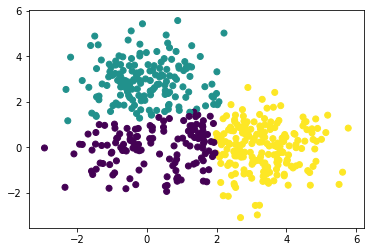

In [226]:
plt.scatter(n[:,0],n[:,1],c=c)

In [1]:
def kmeans(n,k, plotit = False, f= None, idx = None):
    init_u = n[np.random.randint(500, size =k),:]
    dists = {}
    cost_arr = []
    c= np.zeros(500)
    for i in range(20):
        for j in range(k):
            dists[j] = ((n - init_u[j])**2).sum(axis=1)
        for index,val in np.ndenumerate(c):
            c[index] = 0
            tmp= dists[0][index]
            for j in range(k):
                if j ==0: continue
                if tmp > dists[j][index]:
                    c[index] = j
                    tmp= dists[j][index]
        for j in range(k):
            init_u[j] = n[np.where(c==j)].mean(axis=0)
        cost =0
        for j in range(k):
            cost += dists[j][np.where(c==j)].sum()
        cost_arr.append(cost)
    if plotit: 
        plotter = f.add_subplot('53'+str(idx+1))
        plotter.plot(cost_arr)
        plotter.set_xlabel("Iteration Step")
        plotter.set_ylabel("Cost, L2 Norm")
        plotter.set_title("K="  + str(k) + " Cost vs Iteration Step")

    return c
        

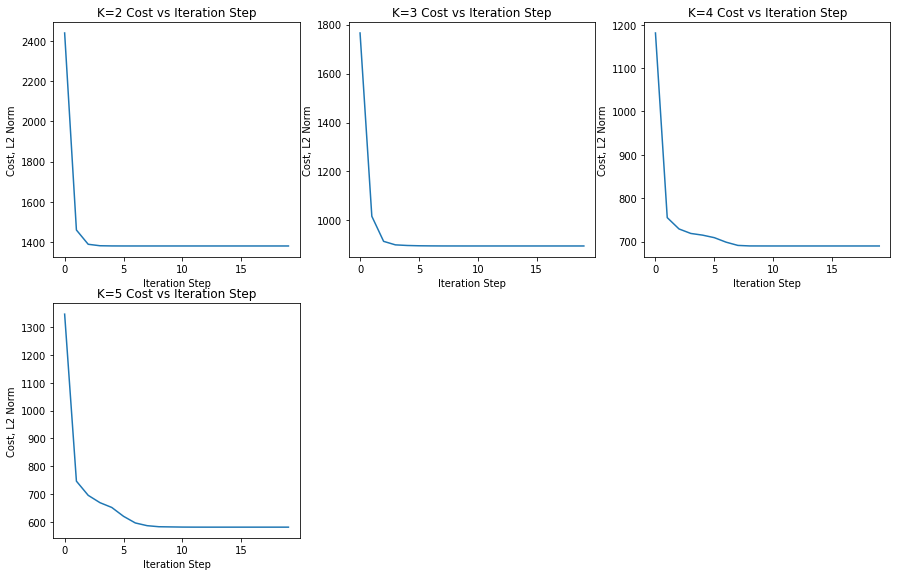

In [243]:
f = plt.figure(figsize=(15,25))
v=0 
for k in [2,3,4,5]:
    kmeans(n,k,plotit=True,f=f, idx =v)
    v+= 1

In [244]:
c3 = kmeans(n,3)
c5 = kmeans(n,5)

Text(0.5, 1.0, 'K=3 Cluster Assignment')

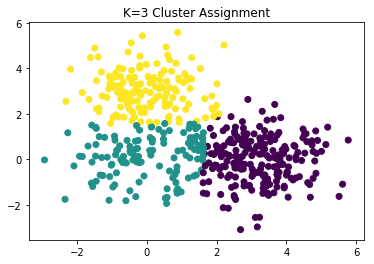

In [249]:
plt.scatter(n[:,0],n[:,1],c=c3)
plt.title('K=3 Cluster Assignment')

Text(0.5, 1.0, 'K=5 Cluster Assignment')

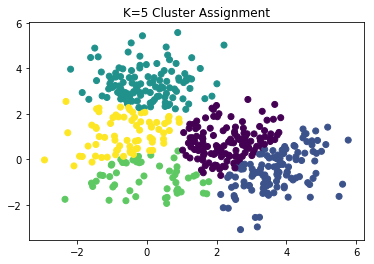

In [250]:
plt.scatter(n[:,0],n[:,1],c=c5)
plt.title('K=5 Cluster Assignment')

## Problem 2

## Problem 3

In [8]:
df = pd.read_csv('data/hw3-data/Prob3_ratings.csv', header= None)

In [10]:
df.columns = ['uid','movie_id','rating']

In [129]:
M= np.zeros((df['uid'].max(),df['movie_id'].max()))

In [130]:
for row in df.iterrows():
    M[int(row[1]['uid']-1), int(row[1]['movie_id']-1)] = row[1]['rating']

In [436]:
U= np.random.multivariate_normal(np.zeros(10),np.identity(10),df['uid'].max())

In [437]:
V= np.random.multivariate_normal(np.zeros(10),np.identity(10),df['movie_id'].max())

ui = index set of objects rated by user i
vj = index set of users who rated object j

In [438]:
for i in range(10):
    for ui in range(M.shape[0]):
        idx = np.where(M[ui] != 0)
        rated = V[idx]
        sol= inv(np.identity(10)*.25 + rated.T.dot(rated)).dot(M[ui][idx].dot(V[idx]))
        U[ui] = sol
    for vj in range(M.shape[1]):
        idx = np.where(M[:,vj] != 0)
        rated = U[idx]
        V[vj] = inv(np.identity(10)*.25 + rated.T.dot(rated)).dot(M[:,vj][idx].dot(U[idx]))                                                    